In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# A Simple Starter Code for the AJL Competition

@Cindy Deng

---


Hi! This starter code is designed to help you get familiar with basic Kaggle operations and guide you through the basic workflow of a machine learning project. 

The code outlines essential steps including data loading, preprocessing, model building, training, and generating predictions. Each section serves as a foundation, but there are many ways to enhance each step to improve your final model's accuracy. Feel free to experiment with different data augmentation techniques, model architectures, and tuning methods to optimize your final results! Some amazing tutorials are available through your AI Studio course in Canvas / in the 'Resource' section of this Kaggle competition.

Good luck and have fun!

---

## Note - About file path

You could use the cell above to print the names of the file directories and get the following directories:

```
/kaggle/input/bttai-ajl-2025/sample_submission.csv
/kaggle/input/bttai-ajl-2025/train.csv
/kaggle/input/bttai-ajl-2025/test.csv
/kaggle/input/bttai-ajl-2025/test/test/e0374ae6c1362ff183cfba28ded5421b.jpg
/kaggle/input/bttai-ajl-2025/test/test/437159c605260bdd079af230566af291.jpg
...
...
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/11271bdf2598afdd4260db3125e1f6a5.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/732819951dcf2b53d15ea7b8bb123b71.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/6dcc7a8abb5e1c6e670101f4b6231246.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/e63c3b3f0ab8905e204fe467cc7411f9.jpg
...
...
```



## 1. Import Necessary Libraries

In [2]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Explanation:
# - pandas and numpy: for data manipulation
# - sklearn: for splitting data and encoding labels
# - tensorflow.keras: for building and training the neural network

## 2. Load Data

Make sure to verify the file paths if you're running on a different platform.

In [3]:
# 2. Load Data
train_df = pd.read_csv('/kaggle/input/bttai-ajl-2025/train.csv')
test_df = pd.read_csv('/kaggle/input/bttai-ajl-2025/test.csv')

# Add .jpg extension to md5hash column to reference the file_name
train_df['md5hash'] = train_df['md5hash'].astype(str) + '.jpg'
test_df['md5hash'] = test_df['md5hash'].astype(str) + '.jpg'

# Combine label and md5hash to form the correct path
train_df['file_path'] = train_df['label'] + '/' + train_df['md5hash']

In [4]:
# Check the first few rows to understand the structure
print(train_df.head())
print(train_df.columns)


                                md5hash  fitzpatrick_scale  \
0  fd06d13de341cc75ad679916c5d7e6a6.jpg                  4   
1  a4bb4e5206c4e89a303f470576fc5253.jpg                  1   
2  c94ce27e389f96bda998e7c3fa5c4a2e.jpg                  5   
3  ebcf2b50dd943c700d4e2b586fcd4425.jpg                  3   
4  c77d6c895f05fea73a8f3704307036c0.jpg                  1   

   fitzpatrick_centaur                             label nine_partition_label  \
0                    4                 prurigo-nodularis     benign-epidermal   
1                    1  basal-cell-carcinoma-morpheiform  malignant-epidermal   
2                    5                            keloid         inflammatory   
3                    3              basal-cell-carcinoma  malignant-epidermal   
4                    1                 prurigo-nodularis     benign-epidermal   

  three_partition_label            qc  ddi_scale  \
0                benign           NaN         34   
1             malignant           Na

/kaggle/input/bttai-ajl-2025//train/train/prurigo-nodularis/fd06d13de341cc75ad679916c5d7e6a6.jpg


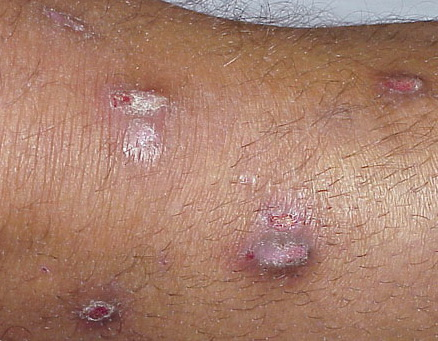

In [5]:
from IPython.display import display
from PIL import Image

base_dir = "/kaggle/input/bttai-ajl-2025//train/train/"  
first_image_path = os.path.join(base_dir, train_df.loc[0, "file_path"])  

print(first_image_path)
image = Image.open(first_image_path)
display(image)

## 3. Data Preprocessing


This section demonstrates basic preprocessing techniques. To enhance data quality and model performance, consider incorporating more advanced preprocessing methods.

For further guidance, feel free to take a look at the [Image Preprocessing tutorial](https://colab.research.google.com/drive/1-ItNcRMbZBE6BCwPT-wD8m3YmHqwHxme?usp=sharing)  available in the 'Resources' section of this Kaggle competition.


In [6]:
# 3. Data Preprocessing
# Encode the labels
label_encoder = LabelEncoder()
train_df['encoded_label'] = label_encoder.fit_transform(train_df['label'])

print(train_df.head())
# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the directory paths
train_dir = '/kaggle/input/bttai-ajl-2025/train/train/'


                                md5hash  fitzpatrick_scale  \
0  fd06d13de341cc75ad679916c5d7e6a6.jpg                  4   
1  a4bb4e5206c4e89a303f470576fc5253.jpg                  1   
2  c94ce27e389f96bda998e7c3fa5c4a2e.jpg                  5   
3  ebcf2b50dd943c700d4e2b586fcd4425.jpg                  3   
4  c77d6c895f05fea73a8f3704307036c0.jpg                  1   

   fitzpatrick_centaur                             label nine_partition_label  \
0                    4                 prurigo-nodularis     benign-epidermal   
1                    1  basal-cell-carcinoma-morpheiform  malignant-epidermal   
2                    5                            keloid         inflammatory   
3                    3              basal-cell-carcinoma  malignant-epidermal   
4                    1                 prurigo-nodularis     benign-epidermal   

  three_partition_label            qc  ddi_scale  \
0                benign           NaN         34   
1             malignant           Na

In [7]:
def create_generator(dataframe, directory, batch_size=32, target_size=(128, 128)):
    
    """
    Template function to create image generators.
    Students should complete this function to load images and labels properly.
    """
    
    # Fill in the correct flow_from_dataframe parameters
    generator = train_datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=directory,
        x_col="file_path",  # Use combined path
        y_col='encoded_label',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw',
        validate_filenames=False  # Disable strict filename validation
    )
    
    return generator

In [8]:

# Create generators
train_generator = create_generator(train_data, train_dir)
val_generator = create_generator(val_data, train_dir)


Found 2288 non-validated image filenames.
Found 572 non-validated image filenames.


## 4. Build the model


In [9]:
# TODO: You should implement the model architecture here.
# Feel free to explore different model types that best serve your purpose.
#training using Convolutional neural networks

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = tf.keras.Sequential([
    # First Conv2D layer with input_shape defined
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    
    # Additional Conv2D layers
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    # Flatten layer to convert 2D output into 1D vector
    layers.Flatten(),
    
    # Dense layer with 1024 neurons
    layers.Dense(1024, activation='relu'),
    
    # Output layer (assuming binary classification)
    layers.Dense(21, activation='sigmoid')  
])

model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      12,846,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 21)                  │          21,525 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,923,925 (49.30 MB)

 Trainable params: 12,923,925 (49.30 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the Model


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_generator,  
    epochs=10, 
    validation_data=val_generator  
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.1128 - loss: 2.9787 - val_accuracy: 0.1573 - val_loss: 2.7367
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.1706 - loss: 2.7019 - val_accuracy: 0.1696 - val_loss: 2.6587
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.2550 - loss: 2.4616 - val_accuracy: 0.2448 - val_loss: 2.5224
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.3655 - loss: 2.1128 - val_accuracy: 0.2762 - val_loss: 2.5341
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.4786 - loss: 1.7440 - val_accuracy: 0.2622 - val_loss: 2.8066
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.6134 - loss: 1.3058 - val_accuracy: 0.2448 - val_loss: 3.1624
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.7621 - loss: 0.8104 - val_accuracy: 0.2762 - val_loss: 3.4895
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.8595 - loss: 0.5151 - val_accuracy: 0.248

## 6. Make Predictions on Test Data

In [11]:
# 6. Make Predictions on Test Data
def preprocess_test_data(test_df, directory):
    """
    Template for loading and preprocessing test images.
    """
    # TODO: create a generator for the test set here.
    if 'file_path' not in test_df.columns:
        test_df['file_path'] = test_df['md5hash'].apply(lambda x: f"{directory}/{x}")
        
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=directory, 
        x_col="md5hash", 
        y_col=None,
        target_size=(128, 128),
        shuffle=False,  
        class_mode=None
    )
    return test_generator




In [12]:
# Load test data

test_dir = '/kaggle/input/bttai-ajl-2025/test/test/'
test_generator = preprocess_test_data(test_df, test_dir)

Found 1227 validated image filenames.


## 7. Generate Predictions

In [13]:
# TODO
# Generate predictions based on the trained model
# Then, save the predictions into a CSV file for submission
predictions = model.predict(test_generator, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step


In [14]:
print(f"Predicted class: {np.argmax(predictions[0])}")
print(f"Predicted probabilities: {predictions[0]}")

Predicted class: 8
Predicted probabilities: [8.4356654e-01 3.0231956e-01 7.6923338e-03 1.6381836e-02 4.6151647e-09
 1.0896688e-02 8.4158272e-01 5.7785070e-07 9.9993169e-01 9.7512972e-01
 3.5774311e-01 2.1077862e-05 1.4228076e-03 8.7492655e-05 7.6822650e-01
 9.8317969e-01 6.0773990e-04 9.7411692e-01 9.1375849e-05 6.1213118e-01
 7.6931674e-06]


In [15]:
print(f"Number of predictions: {predictions.shape[0]}")
print(f"Number of test samples: {test_generator.samples}")

Number of predictions: 1227
Number of test samples: 1227


In [16]:
predicted_labels = np.argmax(predictions, axis=1)

# Create a DataFrame with the filenames and predictions
output_df = pd.DataFrame({
    'file_name': test_generator.filenames,
    'prediction': predicted_labels
})



In [17]:
test_df['file_name'] = test_df['md5hash']
print(output_df['file_name'].isin(test_df['file_name']))

0       True
1       True
2       True
3       True
4       True
        ... 
1222    True
1223    True
1224    True
1225    True
1226    True
Name: file_name, Length: 1227, dtype: bool


In [18]:
# output_df = output_df.merge(test_df, on='file_name', how='left', suffixes=('', '_drop'))
# output_df = output_df.loc[:, ~output_df.columns.str.endswith('_drop')]

print(output_df.head())

                              file_name  prediction
0  0844ae634f0e6e7ef1f73c2aeecbae0e.jpg           8
1  3b290d262098f761d719aa07cf36c040.jpg          10
2  cf561d08ac46d0fda678bff6621005ee.jpg          11
3  e6371069be05c6b0a95b4b3f1bacc9a5.jpg          10
4  f76cddb37265f97508f159078dcc7e7c.jpg          10


In [19]:

print(output_df.nunique())
print('\n')
print(train_df.nunique())
output_df['label'] = label_encoder.inverse_transform(output_df['prediction'])

file_name     1227
prediction      21
dtype: int64


md5hash                  2860
fitzpatrick_scale           7
fitzpatrick_centaur         7
label                      21
nine_partition_label        7
three_partition_label       3
qc                          5
ddi_scale                   4
file_path                2860
encoded_label              21
dtype: int64


In [20]:

output_df = output_df.rename(columns={'file_name': 'md5hash'})
output_df.head()

,md5hash,prediction,label
0,0844ae634f0e6e7ef1f73c2aeecbae0e.jpg,8,eczema
1,3b290d262098f761d719aa07cf36c040.jpg,10,folliculitis
2,cf561d08ac46d0fda678bff6621005ee.jpg,11,kaposi-sarcoma
3,e6371069be05c6b0a95b4b3f1bacc9a5.jpg,10,folliculitis
4,f76cddb37265f97508f159078dcc7e7c.jpg,10,folliculitis


In [21]:
output_df = output_df.drop(columns=['prediction'])
output_df = output_df[['md5hash', 'label']]
output_df['md5hash'] = output_df['md5hash'].str.rstrip('.jpg')
output_df.head()

,md5hash,label
0,0844ae634f0e6e7ef1f73c2aeecbae0e,eczema
1,3b290d262098f761d719aa07cf36c040,folliculitis
2,cf561d08ac46d0fda678bff6621005ee,kaposi-sarcoma
3,e6371069be05c6b0a95b4b3f1bacc9a5,folliculitis
4,f76cddb37265f97508f159078dcc7e7c,folliculitis


In [22]:
# Save the predictions to a CSV file
output_df.to_csv('/kaggle/working/save_predictions.csv', index=False)


print("Predictions saved to CSV.")

Predictions saved to CSV.
